In [1]:
import os
import pandas as pd
from tqdm import tqdm  # for progress bar (optional)

## Preprocess

In [2]:
def combine_pcm_data(folders, target_cores=[3, 4, 5]):
    """
    Combine PCM data from multiple folders into a single DataFrame.
    
    Args:
        folders (list): List of folder paths containing PCM CSV files
        target_cores (list): List of core numbers to focus on (default: [3, 4, 5])
    
    Returns:
        pd.DataFrame: Combined DataFrame with all test data
    """
    all_data = []
    
    for folder in tqdm(folders, desc="Processing folders"):
        # Get all CSV files in the folder
        csv_files = [f for f in os.listdir(folder) if f.endswith('.csv') and f.startswith('pcm_core_')]
        
        for csv_file in tqdm(csv_files, desc=f"Processing files in {folder}", leave=False):
            # Extract TestID from filename
            test_id = csv_file.replace('pcm_core_', '').replace('.csv', '')
            
            # Read CSV file
            file_path = os.path.join(folder, csv_file)
            try:
                df = pd.read_csv(file_path)
                
                # Add metadata columns
                df['Test_ID'] = test_id
                df['FolderID'] = os.path.basename(folder)
                df['UniqueID'] = df['Test_ID'].astype(str) + "_" + df['FolderID']
                
                # Add time step column (1-40)
                df['Time_Step'] = range(1, len(df) + 1)
                
                # Filter for target cores if specified
                if target_cores:
                    # Get all columns that match target cores
                    core_cols = []
                    for core in target_cores:
                        core_cols.extend([col for col in df.columns if f'Core{core}' in col])
                    
                    # Keep only system columns and target core columns
                    system_cols = [col for col in df.columns if 'System' in col or 'SKT0' in col]
                    keep_cols = system_cols + core_cols + ['Test_ID', 'FolderID', 'UniqueID', 'Time_Step']
                    df = df[keep_cols]
                
                all_data.append(df)
                
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue
    
    # Combine all DataFrames
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Convert date/time to datetime object if exists
        if 'System - Date' in combined_df.columns and 'System - Time' in combined_df.columns:
            combined_df['DateTime'] = pd.to_datetime(
                combined_df['System - Date'] + ' ' + combined_df['System - Time']
            )
            # Drop original date/time columns if desired
            # combined_df.drop(['System - Date', 'System - Time'], axis=1, inplace=True)
        
        return combined_df
    else:
        return pd.DataFrame()  # Return empty DataFrame if no data processed




# Save to CSV if needed
# combined_data.to_csv('combined_pcm_data.csv', index=False)

In [3]:
# Example usage:
folders = ["Memento_V01", "Memento_V02", "Memento_V03", "Memento_V04",
           "Memento_V02_3_MixedScenarios", "Memento_V01_mix_scenarios", 
           "TheGame_V01", "TheGame_V02", "TheGame_V02_2", 
           "TheGame_V03", "TheGame_V04", "TheGame_MIX_V01", "TheGame_MIX_V02"]

# Assuming the folders are in the current directory - modify paths as needed


# Get combined data (focusing on cores 3,4,5 by default)
combined_data = combine_pcm_data(folders)
# size of the combined data
print(f"Combined data size: {combined_data.shape}")

Processing folders:   0%|          | 0/13 [00:00<?, ?it/s]

Processing folders: 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]


Combined data size: (102407, 37)


In [4]:
# Display first 100 rows of combined data
display(combined_data.head(100))  # Display first few rows of combined data

,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core3 (Socket 0) - IPC,Core3 (Socket 0) - L3MISS,...,Core5 (Socket 0) - C0res%,Core5 (Socket 0) - C1res%,Core5 (Socket 0) - C6res%,Core5 (Socket 0) - PhysIPC,Core5 (Socket 0) - PhysIPC%,Test_ID,FolderID,UniqueID,Time_Step,DateTime
0,2025-07-01,09:47:02.180,1.13,91.81,0.0,1.13,91.81,0.0,1.15,0.01,...,1.32,93.47,0.0,2.98,59.54,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,1,2025-07-01 09:47:02.180
1,2025-07-01,09:47:07.181,1.31,98.69,0.0,1.31,98.69,0.0,0.69,0.01,...,0.79,99.21,0.0,1.95,39.01,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,2,2025-07-01 09:47:07.181
2,2025-07-01,09:47:12.181,1.18,98.82,0.0,1.18,98.82,0.0,0.70,0.01,...,2.07,97.93,0.0,3.74,74.84,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,3,2025-07-01 09:47:12.181
3,2025-07-01,09:47:17.181,1.33,98.67,0.0,1.33,98.67,0.0,0.71,0.02,...,0.89,99.11,0.0,2.32,46.50,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,4,2025-07-01 09:47:17.181
4,2025-07-01,09:47:22.181,1.30,98.70,0.0,1.30,98.70,0.0,1.52,0.02,...,0.83,99.17,0.0,1.77,35.32,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,5,2025-07-01 09:47:22.181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-07-01,03:51:45.021,0.92,78.72,0.0,0.92,78.72,0.0,1.90,0.01,...,3.89,75.44,0.0,3.74,74.76,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,22,2025-07-01 03:51:45.021
96,2025-07-01,03:51:50.022,0.90,77.94,0.0,0.90,77.94,0.0,1.87,0.01,...,3.81,74.68,0.0,3.81,76.18,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,23,2025-07-01 03:51:50.022
97,2025-07-01,03:51:55.022,0.90,78.14,0.0,0.90,78.14,0.0,1.88,0.01,...,3.78,75.72,0.0,3.81,76.15,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,24,2025-07-01 03:51:55.022
98,2025-07-01,03:52:00.022,0.88,78.10,0.0,0.88,78.10,0.0,1.72,0.01,...,2.60,79.70,0.0,3.59,71.83,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,25,2025-07-01 03:52:00.022


In [5]:
# Display distict Test_IDs and their values
print(f"Distinct Test_IDs: {combined_data['Test_ID'].unique()}")
print(f"Distinct Test_IDs: {combined_data['Test_ID'].nunique()}")

Distinct Test_IDs: ['1replicas_scenario31_3000rps' '1replicas_scenario0_1500rps'
 '1replicas_scenario32_100rps' '1replicas_scenario21_3500rps'
 '1replicas_scenario1_2500rps' '1replicas_scenario32_4000rps'
 '1replicas_scenario23_2000rps' '1replicas_scenario31_500rps'
 '1replicas_scenario24_1500rps' '1replicas_scenario23_100rps'
 '1replicas_scenario13_500rps' '1replicas_scenario13_4000rps'
 '1replicas_scenario32_1500rps' '1replicas_scenario32_2500rps'
 '1replicas_scenario0_1000rps' '1replicas_scenario2_1500rps'
 '1replicas_scenario22_4000rps' '1replicas_scenario12_2500rps'
 '1replicas_scenario14_2000rps' '1replicas_scenario1_3500rps'
 '1replicas_scenario23_4000rps' '1replicas_scenario34_2000rps'
 '1replicas_scenario33_3500rps' '1replicas_scenario32_3000rps'
 '1replicas_scenario31_2500rps' '1replicas_scenario22_1500rps'
 '1replicas_scenario1_3000rps' '1replicas_scenario11_3000rps'
 '1replicas_scenario33_100rps' '1replicas_scenario34_3500rps'
 '1replicas_scenario13_3000rps' '1replicas_scen

## Data Enrichment

In [6]:
def enrich_data(df):
    """
    Add scenario labels, RPS, and interference metadata to the DataFrame.
    """
    df = df.copy()
    
    # Extract RPS from Test_ID
    df['RPS'] = df['Test_ID'].str.extract(r'(\d+)rps')[0].astype(float)
    
    # Extract scenario number
    df['Scenario_Num'] = df['Test_ID'].str.extract(r'scenario(\d+)')[0].astype(float)
    
    # Label scenarios based on interference type
    def generate_label(row):
        scenario_num = row['Scenario_Num']
        if scenario_num in [0, 1, 2, 3, 4]:
            return f"B{int(scenario_num)}"
        elif 11 <= scenario_num <= 14:
            return f"CPU{int(scenario_num - 10)}"
        elif 21 <= scenario_num <= 24:
            return f"L3_{int(scenario_num - 20)}"
        elif 31 <= scenario_num <= 34:
            return f"MEM{int(scenario_num - 30)}"
        elif 51 <= scenario_num <= 58:
            return f"MIX{int(scenario_num - 50)}"
        return "Unknown"
    
    df['Scenario_Label'] = df.apply(generate_label, axis=1)
    
    # Add interference type
    def get_interference_type(label):
        if label.startswith('B'):
            return 'Baseline'
        elif label.startswith('CPU'):
            return 'CPU'
        elif label.startswith('L3'):
            return 'L3'
        elif label.startswith('MEM'):
            return 'MEM'
        elif label.startswith('MIX'):
            return 'MIX'
        return 'Unknown'
    
    df['Interference_Type'] = df['Scenario_Label'].apply(get_interference_type)
    
    return df

In [7]:
enriched_data = enrich_data(combined_data)
# Display enriched data
print(f"Enriched data size: {enriched_data.shape}")

Enriched data size: (102407, 41)


In [8]:
display(enriched_data.head(100))  # Display first few rows of enriched data

,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core3 (Socket 0) - IPC,Core3 (Socket 0) - L3MISS,...,Core5 (Socket 0) - PhysIPC%,Test_ID,FolderID,UniqueID,Time_Step,DateTime,RPS,Scenario_Num,Scenario_Label,Interference_Type
0,2025-07-01,09:47:02.180,1.13,91.81,0.0,1.13,91.81,0.0,1.15,0.01,...,59.54,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,1,2025-07-01 09:47:02.180,3000.0,31.0,MEM1,MEM
1,2025-07-01,09:47:07.181,1.31,98.69,0.0,1.31,98.69,0.0,0.69,0.01,...,39.01,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,2,2025-07-01 09:47:07.181,3000.0,31.0,MEM1,MEM
2,2025-07-01,09:47:12.181,1.18,98.82,0.0,1.18,98.82,0.0,0.70,0.01,...,74.84,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,3,2025-07-01 09:47:12.181,3000.0,31.0,MEM1,MEM
3,2025-07-01,09:47:17.181,1.33,98.67,0.0,1.33,98.67,0.0,0.71,0.02,...,46.50,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,4,2025-07-01 09:47:17.181,3000.0,31.0,MEM1,MEM
4,2025-07-01,09:47:22.181,1.30,98.70,0.0,1.30,98.70,0.0,1.52,0.02,...,35.32,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,5,2025-07-01 09:47:22.181,3000.0,31.0,MEM1,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-07-01,03:51:45.021,0.92,78.72,0.0,0.92,78.72,0.0,1.90,0.01,...,74.76,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,22,2025-07-01 03:51:45.021,100.0,32.0,MEM2,MEM
96,2025-07-01,03:51:50.022,0.90,77.94,0.0,0.90,77.94,0.0,1.87,0.01,...,76.18,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,23,2025-07-01 03:51:50.022,100.0,32.0,MEM2,MEM
97,2025-07-01,03:51:55.022,0.90,78.14,0.0,0.90,78.14,0.0,1.88,0.01,...,76.15,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,24,2025-07-01 03:51:55.022,100.0,32.0,MEM2,MEM
98,2025-07-01,03:52:00.022,0.88,78.10,0.0,0.88,78.10,0.0,1.72,0.01,...,71.83,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,25,2025-07-01 03:52:00.022,100.0,32.0,MEM2,MEM


In [9]:
# Print all columns
pd.set_option('display.max_columns', None)
display(enriched_data)

,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core3 (Socket 0) - IPC,Core3 (Socket 0) - L3MISS,Core3 (Socket 0) - L2MISS,Core3 (Socket 0) - C0res%,Core3 (Socket 0) - C1res%,Core3 (Socket 0) - C6res%,Core3 (Socket 0) - PhysIPC,Core3 (Socket 0) - PhysIPC%,Core4 (Socket 0) - IPC,Core4 (Socket 0) - L3MISS,Core4 (Socket 0) - L2MISS,Core4 (Socket 0) - C0res%,Core4 (Socket 0) - C1res%,Core4 (Socket 0) - C6res%,Core4 (Socket 0) - PhysIPC,Core4 (Socket 0) - PhysIPC%,Core5 (Socket 0) - IPC,Core5 (Socket 0) - L3MISS,Core5 (Socket 0) - L2MISS,Core5 (Socket 0) - C0res%,Core5 (Socket 0) - C1res%,Core5 (Socket 0) - C6res%,Core5 (Socket 0) - PhysIPC,Core5 (Socket 0) - PhysIPC%,Test_ID,FolderID,UniqueID,Time_Step,DateTime,RPS,Scenario_Num,Scenario_Label,Interference_Type
0,2025-07-01,09:47:02.180,1.13,91.81,0.0,1.13,91.81,0.0,1.15,0.01,0.46,1.96,87.98,0.0,2.31,46.18,1.69,0.01,0.31,2.55,90.81,0.0,3.39,67.73,1.49,0.01,0.17,1.32,93.47,0.0,2.98,59.54,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,1,2025-07-01 09:47:02.180,3000.0,31.0,MEM1,MEM
1,2025-07-01,09:47:07.181,1.31,98.69,0.0,1.31,98.69,0.0,0.69,0.01,0.57,1.72,98.28,0.0,1.39,27.79,1.93,0.01,0.28,4.47,95.53,0.0,3.85,77.05,0.98,0.01,0.21,0.79,99.21,0.0,1.95,39.01,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,2,2025-07-01 09:47:07.181,3000.0,31.0,MEM1,MEM
2,2025-07-01,09:47:12.181,1.18,98.82,0.0,1.18,98.82,0.0,0.70,0.01,0.56,1.69,98.31,0.0,1.39,27.90,1.30,0.01,0.41,1.98,98.02,0.0,2.60,52.04,1.87,0.01,0.16,2.07,97.93,0.0,3.74,74.84,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,3,2025-07-01 09:47:12.181,3000.0,31.0,MEM1,MEM
3,2025-07-01,09:47:17.181,1.33,98.67,0.0,1.33,98.67,0.0,0.71,0.02,0.58,1.73,98.27,0.0,1.42,28.33,1.89,0.01,0.32,4.27,95.71,0.0,3.79,75.79,1.16,0.01,0.20,0.89,99.11,0.0,2.32,46.50,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,4,2025-07-01 09:47:17.181,3000.0,31.0,MEM1,MEM
4,2025-07-01,09:47:22.181,1.30,98.70,0.0,1.30,98.70,0.0,1.52,0.02,0.47,3.17,96.83,0.0,3.03,60.67,1.71,0.01,0.33,2.95,97.05,0.0,3.43,68.58,0.88,0.01,0.21,0.83,99.17,0.0,1.77,35.32,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,5,2025-07-01 09:47:22.181,3000.0,31.0,MEM1,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102402,2025-07-25,09:05:15.494,1.46,98.54,0.0,1.46,98.54,0.0,0.65,0.02,0.21,1.95,98.05,0.0,1.30,25.98,0.75,0.02,0.24,1.99,98.00,0.0,1.49,29.83,0.81,0.02,0.20,2.00,98.00,0.0,1.61,32.26,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,87,2025-07-25 09:05:15.494,3000.0,51.0,MIX1,MIX
102403,2025-07-25,09:05:17.494,1.34,98.65,0.0,1.34,98.65,0.0,0.61,0.02,0.19,1.63,98.37,0.0,1.23,24.55,0.74,0.02,0.19,1.64,98.36,0.0,1.48,29.66,0.75,0.02,0.21,1.79,98.20,0.0,1.49,29.88,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,88,2025-07-25 09:05:17.494,3000.0,51.0,MIX1,MIX
102404,2025-07-25,09:05:19.494,1.41,98.58,0.0,1.41,98.58,0.0,0.65,0.02,0.19,1.78,98.22,0.0,1.29,25.90,0.77,0.02,0.18,1.70,98.29,0.0,1.54,30.85,0.71,0.02,0.19,1.55,98.43,0.0,1.42,28.30,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,89,2025-07-25 09:05:19.494,3000.0,51.0,MIX1,MIX
102405,2025-07-25,09:05:21.494,1.25,98.74,0.0,1.25,98.74,0.0,0.70,0.02,0.20,1.50,98.50,0.0,1.40,27.98,0.83,0.02,0.19,1.46,98.53,0.0,1.65,33.10,0.72,0.02,0.20,1.46,98.53,0.0,1.45,28.91,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,90,2025-07-25 09:05:21.494,3000.0,51.0,MIX1,MIX


## Pearson

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pcm_corr(df, metrics, title="Correlation Between PCM Metrics"):
    """
    Plots a heatmap showing the Pearson correlation between selected PCM metrics.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the metrics (e.g., enriched_data)
    - metrics: list of str
        List of column names to include in the correlation analysis
    - title: str
        Title of the plot (optional)
    """
    corr = df[metrics].corr(method='pearson')
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


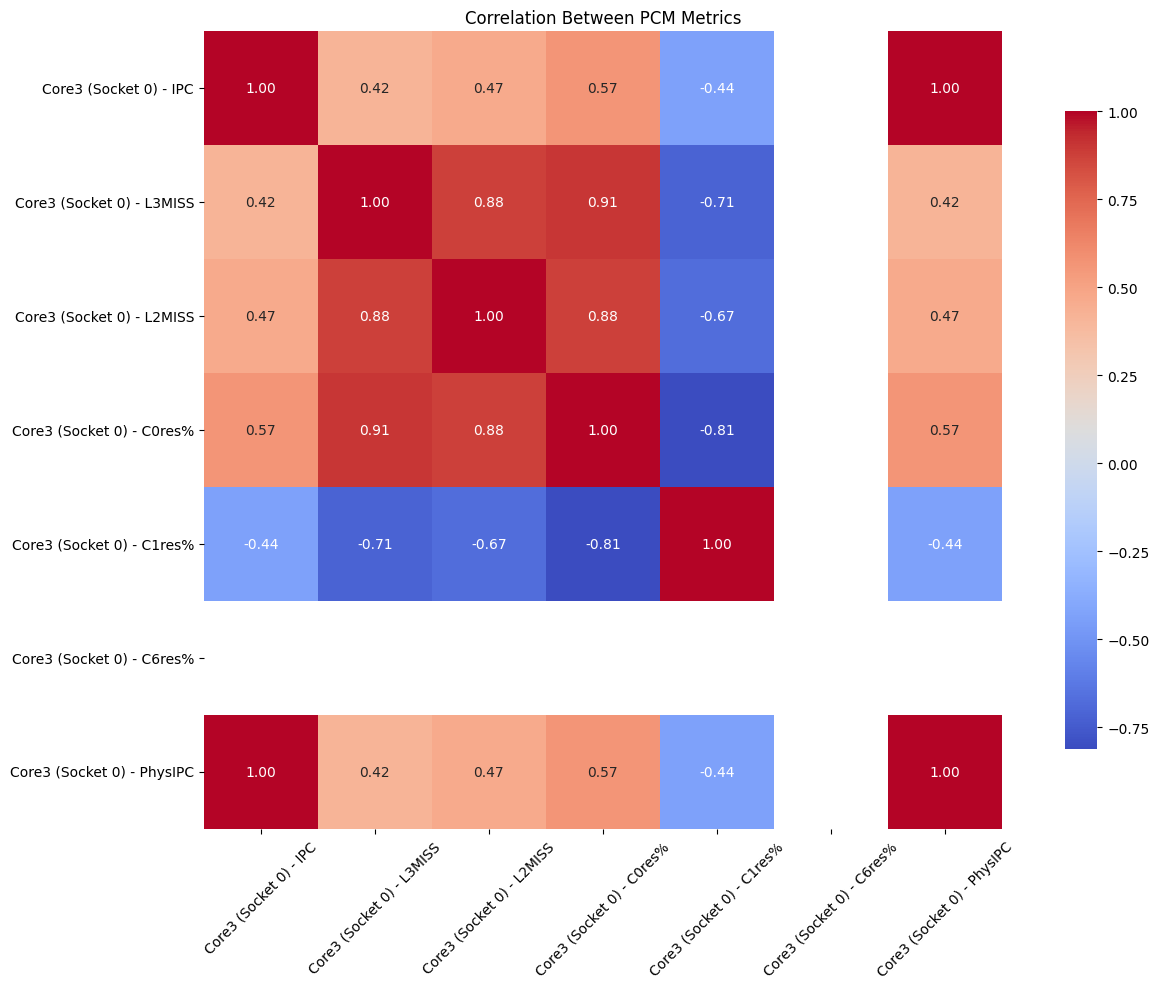

In [13]:
plot_pcm_corr(enriched_data, [
    'Core3 (Socket 0) - IPC',
    'Core3 (Socket 0) - L3MISS',
    'Core3 (Socket 0) - L2MISS',
    'Core3 (Socket 0) - C0res%',
    'Core3 (Socket 0) - C1res%',
    'Core3 (Socket 0) - C6res%',
    'Core3 (Socket 0) - PhysIPC'
])
